# Setup

## Install VirtualHome (Colab)

In [1]:
import matplotlib.pyplot as plt
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !pip install git+https://github.com/xavierpuigf/colabstreamer
    !git clone https://github.com/xavierpuigf/virtualhome.git
    import colabstreamer
    colabstreamer.config_all()
    _xorg = colabstreamer.open_xorg()
    display = "0"
else:  
    import getpass
    import os
    password = getpass.getpass()
    %cd ../..
    !git clone https://github.com/xavierpuigf/virtualhome.git
    %cd virtualhome/helper_scripts
    command = 'sudo -S python startx.py 1'
    display = "1"
    os.popen(command, 'w').write(password+'\n')
    %cd ../../
    

Running on CoLab
  Cloning https://github.com/xavierpuigf/colabstreamer to /tmp/pip-req-build-q3d58plp
  Running command git clone -q https://github.com/xavierpuigf/colabstreamer /tmp/pip-req-build-q3d58plp
     |████████████████████████████████| 179 kB 4.4 MB/s 
  Created wheel for colabstreamer.py: filename=colabstreamer.py-0.1-py3-none-any.whl size=3830 sha256=6f079c363f91b60eae773ddbe7fec26e288b8e814beffcd86a1a329276fb6927
  Stored in directory: /tmp/pip-ephem-wheel-cache-ec3ckgud/wheels/7e/df/62/68e8e5813ab1ac489ca123bc4051459c61ba909df0ec7ac404
Successfully built colabstreamer.py
Cloning into 'virtualhome'...
remote: Enumerating objects: 27204, done.
remote: Counting objects: 100% (588/588), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 27204 (delta 381), reused 553 (delta 363), pack-reused 26616
Receiving objects: 100% (27204/27204), 287.36 MiB | 11.98 MiB/s, done.
Resolving deltas: 100% (17650/17650), done.
Will Install xvfb
Will Install xserver-xorg
Wi

In [2]:
# Download the simulator
! wget http://virtual-home.org/linux_exec.zip
! unzip -q linux_exec.zip
import os
fpath = os.getcwd()

--2022-04-25 15:07:56--  http://virtual-home.org/linux_exec.zip
Resolving virtual-home.org (virtual-home.org)... 128.30.100.223
Connecting to virtual-home.org (virtual-home.org)|128.30.100.223|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 901763908 (860M) [application/zip]
Saving to: ‘linux_exec.zip’

linux_exec.zip      100%[===================>] 859.99M  1.76MB/s    in 4m 25s  

2022-04-25 15:12:22 (3.25 MB/s) - ‘linux_exec.zip’ saved [901763908/901763908]



In [3]:
fpath

'/content'

In [4]:
!pip install ipdb

     |████████████████████████████████| 793 kB 4.1 MB/s 
     |████████████████████████████████| 381 kB 62.0 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=dfc1f619e161383c8e6eb95797287689ecacbdb9de63eb684ec8d7fa2bec384d
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 

In [50]:
%cd /content/
import sys
sys.path.append('./virtualhome')
from simulation.unity_simulator import comm_unity
import demo.utils_demo as utils_demo
%matplotlib notebook
import IPython.display

%matplotlib notebook
import IPython.display
import glob
%cd /content/virtualhome/demo
from utils_demo import *
from sys import platform
import sys
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
sys.path.append('../simulation')
from unity_simulator.comm_unity import UnityCommunication
from unity_simulator import utils_viz

comm = comm_unity.UnityCommunication(file_name=f"{fpath}/linux_exec.x86_64", port='8030', x_display=display)

/content
/content/virtualhome/demo
['/content/linux_exec.x86_64', '-batchmode', '-http-port=8030', '-logFile /content/virtualhome/demo/Player_8030.log']
Getting connection...


In [51]:
### set original environment
comm.reset(3)
comm.add_character('Chars/female2', initial_room='kitchen')
comm.add_character('Chars/Male2', initial_room='livingroom')
success, graph = comm.environment_graph();

In [ ]:
##   YOU CAN ADD OBJ HERE
#table = find_nodes(graph, class_name='kitchentable')[0]
#print(table)
#add_node(graph, {'class_name': 'apple', 
#                   'category': 'fruit', 
#                   'id': 1000, 
#                   'properties': [], 
#                   'states': []})
#add_edge(graph, 1000, 'ON', table['id'])
#success, message = comm.expand_scene(graph)
#success, graph_1 = comm.environment_graph();

In [52]:
len(graph['nodes'])

446

In [53]:
from numpy.random import seed
from numpy.random import randint
seed(3)
# generate some index 
values = randint(0, len(graph['nodes']), 100)

In [54]:
### decide what to keep(interact) in the simplifeid graph

# kept_obj = ['kitchentable','apple','bed']
kept_obj = []
#kept_cat = ['Characters','Furniture','Food','Rooms']
kept_cat = ['Characters','Rooms']
partial_kept = ['Furniture','Props','Food']
#room = ['kitchen','livingroom','bathroom']
#kept_cat = ['Doors','Rooms','Floor','Walls','Characters','Ceiling']

kept = [node for node in graph['nodes'] if (node['category'] in kept_cat) | ((node['category'] in partial_kept) & (node['id'] in values))]
#partial = [node for node in graph['nodes'] if (node['category'] in partial_kept) and (node['id']<=200)]
#kept = kept+partial
kept_id = [kept[i]['id'] for i in range(len(kept))]

In [55]:
len(kept)

56

In [56]:
new_graph = {
    'nodes': kept,
    'edges': [edge for edge in graph['edges'] if edge['from_id'] in kept_id and edge['to_id'] in kept_id]
}
comm.expand_scene(new_graph)
s, g = comm.environment_graph()

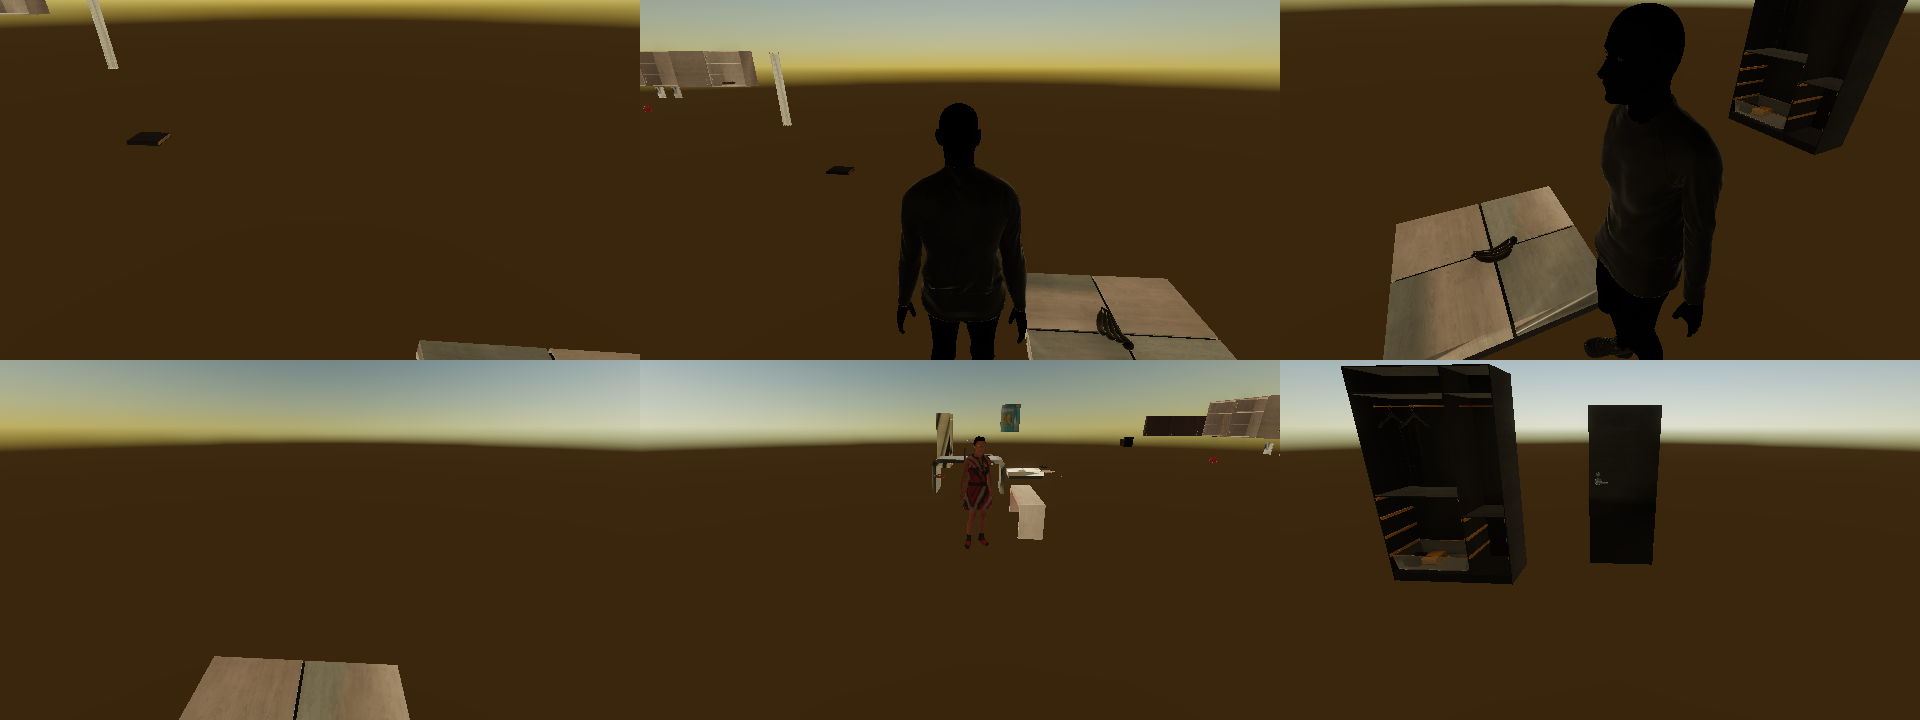

In [57]:
s, nc = comm.camera_count()
indices = range(nc - 6, nc)
imgs_prev = get_scene_cameras(comm, indices)
display_grid_img(imgs_prev, nrows=2)

In [66]:
import json
with open("simplified_sample.json", "w") as outfile:
    json.dump(new_graph, outfile)


with open("original_sample.json", "w") as outfile:
    json.dump(graph, outfile)

## Generate possible goals

In [59]:
surface = [new_graph['nodes'][i] for i in range(len(new_graph['nodes'])) if ('SURFACES' in new_graph['nodes'][i]['properties'])]
#move = [new_graph['nodes'][i] for i in range(len(new_graph['nodes'])) if ('MOVABLE' in new_graph['nodes'][i]['properties'])]

In [ ]:
#goals=[]
#for i in range(len(surface)):
#  for j in range(len(move)):
#    goal = '(ontop {}_{} {}_{})'.format(move[j]['class_name'], move[j]['id'], surface[i]['class_name'], surface[i]['id'])
#    goals.append(goal)


In [60]:
#goals=[]
inside = [new_graph['nodes'][i] for i in range(len(new_graph['nodes'])) if ('CONTAINERS' in new_graph['nodes'][i]['properties'])]
grab = [new_graph['nodes'][i] for i in range(len(new_graph['nodes'])) if ('GRABBABLE' in new_graph['nodes'][i]['properties'])]
#for i in range(len(inside)):
#  for j in range(len(grab)):
#    goal = '(inside {}_{} {}_{})'.format(grab[j]['class_name'], grab[j]['id'], inside[i]['class_name'], inside[i]['id'])
#    goals.append(goal)

In [61]:
new_graph['nodes']


[{'bounding_box': {'center': [0.0364713073, 0.79532063, -7.18645954],
   'size': [1.1526475, 1.81092668, 1.69524193]},
  'category': 'Characters',
  'class_name': 'character',
  'id': 1,
  'obj_transform': {'position': [0.07160246, 1.25, -7.178095],
   'rotation': [0.0, 0.531281948, 0.0, 0.8471951]},
  'prefab_name': 'Female2',
  'properties': [],
  'states': []},
 {'bounding_box': {'center': [4.8767004, 2.10012054, -7.448013],
   'size': [1.79365444, 2.05419445, 0.756271362]},
  'category': 'Characters',
  'class_name': 'character',
  'id': 2,
  'obj_transform': {'position': [4.87524652, 1.25, -7.426686],
   'rotation': [0.0, -0.0340280943, 0.0, 0.9994209]},
  'prefab_name': 'Male2',
  'properties': [],
  'states': []},
 {'bounding_box': {'center': [-4.00999928, 1.247, 0.624722],
   'size': [10.2500019, 3.0, 5.696556]},
  'category': 'Rooms',
  'class_name': 'bathroom',
  'id': 11,
  'obj_transform': {'position': [-6.385, -0.003, -0.527],
   'rotation': [0.0, 0.0, 0.0, 1.0]},
  'prefa

In [ ]:
#goals

In [62]:
len(grab)
import random

In [63]:
import random

num_task = 200
t = {}
task = []
#random.sample(range(100), 10)
for i in range(num_task):
  #r_1 = randint(0,len(goals),2)
  r_1 = randint(0,len(surface),1)
  r_2 = randint(0,len(inside),1)
  r_3 = random.sample(range(len(grab)), 4)
  #r_3 = randint(0,len(grab),4)
  sub_goal = []
  sub_task = '(and ' + ' (ontop {}_{} {}_{})'.format(grab[r_3[2]]['class_name'], grab[r_3[2]]['id'], surface[r_1[0]]['class_name'], surface[r_1[0]]['id']) + ' (inside {}_{} {}_{})'.format(grab[r_3[3]]['class_name'], grab[r_3[3]]['id'], inside[r_2[0]]['class_name'], inside[r_2[0]]['id'])
  sub_task = sub_task + ' (grabbed character_1 {}_{})'.format(grab[r_3[0]]['class_name'], grab[r_3[0]]['id']) + ' (grabbed character_2 {}_{})'.format(grab[r_3[1]]['class_name'], grab[r_3[1]]['id'])+ ')'
  sub_goal.append(' (ontop {}_{} {}_{})'.format(grab[r_3[2]]['class_name'], grab[r_3[2]]['id'], surface[r_1[0]]['class_name'], surface[r_1[0]]['id']))
  sub_goal.append(' (inside {}_{} {}_{})'.format(grab[r_3[3]]['class_name'], grab[r_3[3]]['id'], inside[r_2[0]]['class_name'], inside[r_2[0]]['id']))
  sub_goal.append('(grabbed character_1 {}_{})'.format(grab[r_3[0]]['class_name'], grab[r_3[0]]['id']))
  sub_goal.append('(grabbed character_2 {}_{})'.format(grab[r_3[1]]['class_name'], grab[r_3[1]]['id']))
  task.append(sub_task)
  t[sub_task] = sub_goal



In [67]:
with open("goals.json", "w") as outfile:
    json.dump(t, outfile)


In [64]:
task

['(and  (ontop hanger_138 nightstand_106) (inside clothespants_383 clothespile_169) (grabbed character_1 hanger_119) (grabbed character_2 dishbowl_289))',
 '(and  (ontop hanger_117 nightstand_106) (inside clothespants_379 closet_375) (grabbed character_1 dishbowl_289) (grabbed character_2 clothespants_141))',
 '(and  (ontop clothespile_165 bathroomcabinet_49) (inside hanger_148 kitchencabinet_235) (grabbed character_1 bellpepper_322) (grabbed character_2 hanger_119))',
 '(and  (ontop clothespile_165 kitchencabinet_235) (inside towel_54 bathroomcabinet_49) (grabbed character_1 bellpepper_322) (grabbed character_2 plate_274))',
 '(and  (ontop clothespants_379 bathroomcabinet_49) (inside clothesshirt_131 clothespile_398) (grabbed character_1 clothespile_398) (grabbed character_2 hanger_138))',
 '(and  (ontop clothespile_400 nightstand_106) (inside clothespants_141 kitchencabinet_235) (grabbed character_1 towel_54) (grabbed character_2 dishbowl_318))',
 '(and  (ontop clothespile_150 bench_